### Regression Analysis

In [141]:
#Libraries required:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [142]:
#reading the dataframe

df = pd.read_csv('/Insurance_Data_Project.csv')
df

,age,gender,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


In [143]:
#total records(rows) & columns present in the dataset
df.shape

(1338, 8)

In [144]:
#checking if any null values
df.isnull().sum()

,0
age,0
gender,0
bmi,0
classif,8
children,0
smoker,0
region,0
charges,0


classif column has '8' null values.

In [145]:
print("The Missing value percentage of classif column is:",(df.classif.isnull().sum()/df.classif.shape[0]*100)
)

The Missing value percentage of classif column is: 0.5979073243647235


In [146]:
#replaced the missing column values with using Mode (Central Tendency Measure)

df['classif'].fillna(df['classif'].mode()[0], inplace=True)

In [147]:
#No null values

df.isnull().sum()

,0
age,0
gender,0
bmi,0
classif,0
children,0
smoker,0
region,0
charges,0


In [148]:
#duplicate records

df.duplicated().sum()

np.int64(1)

In [149]:
#keeping the first duplicates and dropping the next occuring duplicate record

df.drop_duplicates(keep='first',inplace=True)

In [150]:
#information of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   gender    1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   classif   1337 non-null   object 
 4   children  1337 non-null   int64  
 5   smoker    1337 non-null   object 
 6   region    1337 non-null   object 
 7   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 94.0+ KB


In [151]:
#statistical description of the numerical data

df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.148841,30.663452,1.095737,13279.121487
std,14.954106,6.100468,1.205571,12110.359656
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,190.000000,53.130000,5.000000,63770.428010


In [152]:
#created a function to divide the categorical and numerical values

from tabulate import tabulate
def dtype(col):
    cat = []
    con = []
    for col in df:
        if(df[col].dtypes == 'object'):
            cat.append(col)
        else:
            con.append(col)
    return cat, con
cat, con = dtype(df)
table = [cat, con]
print(tabulate({"Categorical": cat, "Continuous": con}, headers=['Category', "Continuous"]))

Category    Continuous
----------  ------------
gender      age
classif     bmi
smoker      children
region      charges


In [153]:
#created a function for category column info

def cat_info(col):
    print(f'Unique values in {col} :{df[col].nunique()}')
    print(f'Missing values count for {col} : {df[col].isnull().sum()}')
    print(f'Mode of {col} : {df[col].mode()[0]}')
    value_count=df[col].value_counts()
    value_per=df[col].value_counts(normalize=True)*100

#created a function for category column visualization

def visual(col):
    value_count=df[col].value_counts()
    value_per=df[col].value_counts(normalize=True)*100
    plt.figure(figsize=(5,3))
    plt.bar(value_count.index,value_count.values)
    plt.title(f'Value count of {col}')

    plt.figure(figsize=(5,3))
    plt.pie(value_per.values,labels=value_count.index,autopct='%1.1f%%')
    plt.title(f'Percentage of {col}')

def main_cat(col):
    cat_info(col)
    visual(col)

Unique values in gender :2
Missing values count for gender : 0
Mode of gender : male


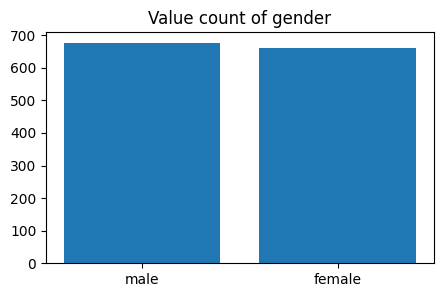

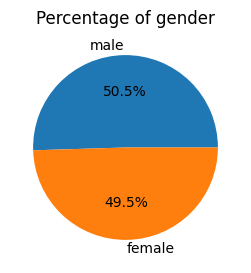

In [154]:
main_cat('gender')

**The Male count is More than the Female Count**

Unique values in classif :6
Missing values count for classif : 0
Mode of classif : OB1


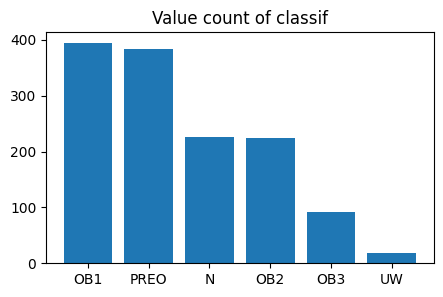

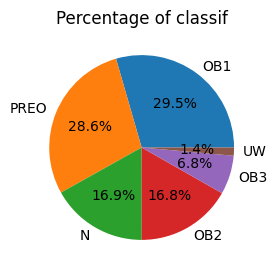

In [155]:
main_cat('classif')

**most of the people are in Obesity Stage 1, followed by Pre-Obesity Stage and Under Weight category are around 1.4%**

Unique values in smoker :2
Missing values count for smoker : 0
Mode of smoker : no


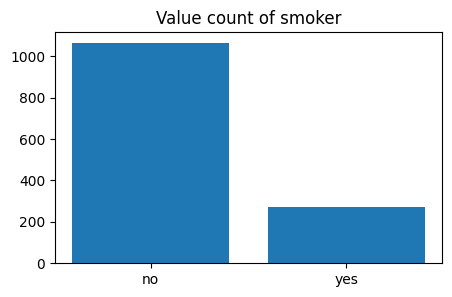

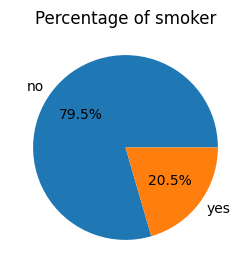

In [156]:
main_cat('smoker')

**Only 20% of the people Smoke**

Unique values in region :4
Missing values count for region : 0
Mode of region : southeast


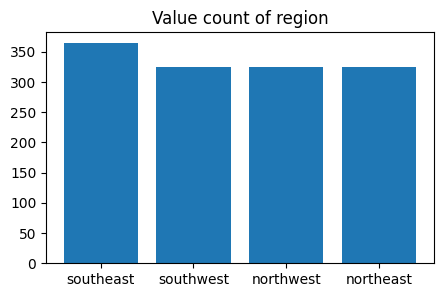

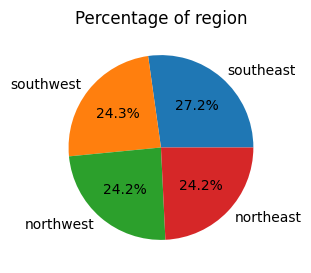

In [157]:
main_cat('region')

**From SouthEast region the count is slightly more when compared with other region's**

In [158]:
#created a function for numerical column info
def num_info(col):
    print(col)
    print("Mean", df[col].mean())
    print(f'skewness {df[col].skew()}')
    print(f'kurtos {df[col].kurt()}')

#created a function for numerical column visualization

def num_visual(col):
    fig,ax=plt.subplots(2,1,figsize=(6,7))
    ax[0].hist(df[col])
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('count')
    sns.boxplot(y=df[col],ax=ax[1])
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('count')
def main_num(col):
    num_info(col)
    num_visual(col)

age
Mean 39.148840688107704
skewness 0.5774740639542997
kurtos 7.590200244148235


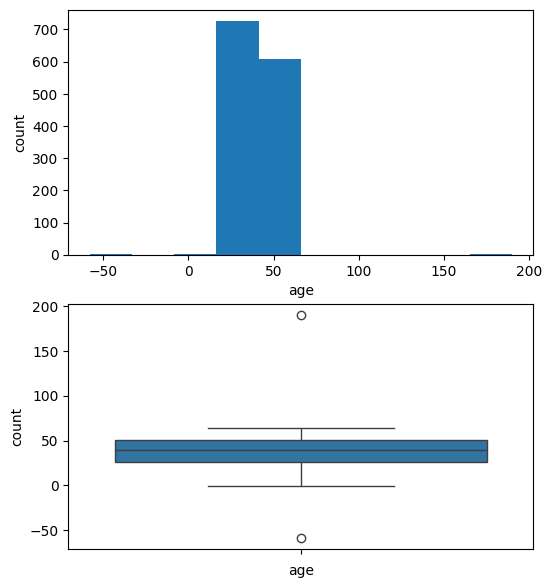

In [159]:
main_num('age')

In [160]:
# a = df[(df["age"] > 0) | (df["age"] < 100)].index
# for i in a:
#     df.loc[i, "age"] = df["age"].mean()

In [161]:
#As 'age' column having outliers, treated the outliers with mean()

df["age"][(df["age"]<5)|(df["age"]>100)]=round(df["age"].mean(),0)

age
Mean 39.19670905011219
skewness 0.05663579975076165
kurtos -1.2346063719322362


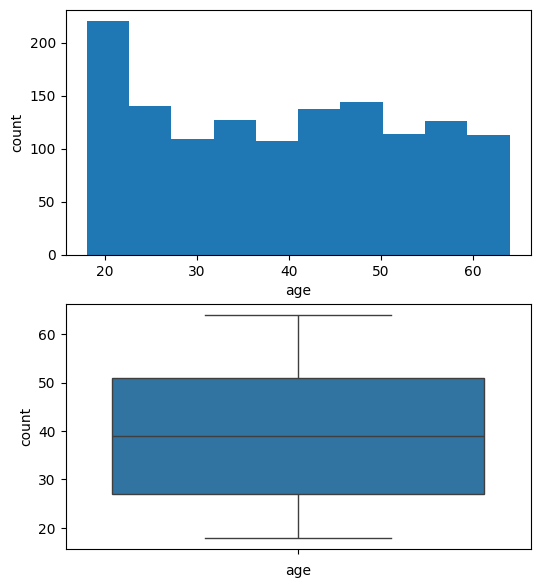

In [162]:
main_num('age')

**Most Customers age is in between 20 - 55**

In [163]:
df['bmi'] = df['bmi'].clip(upper = df['bmi'].quantile(0.95))

bmi
Mean 30.515872101720273
skewness -0.001862426720321735
kurtos -0.6775601051277658


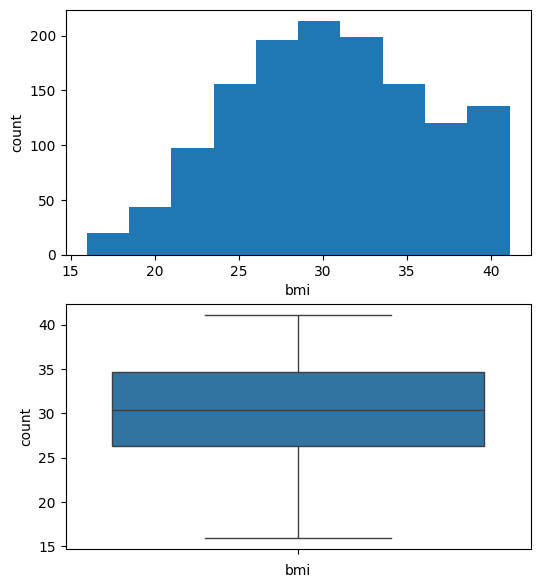

In [164]:
main_num('bmi')

**Most Customers bmi index is between 25 - 35**

children
Mean 1.0957367240089753
skewness 0.9374206440474123
kurtos 0.20095444040352417


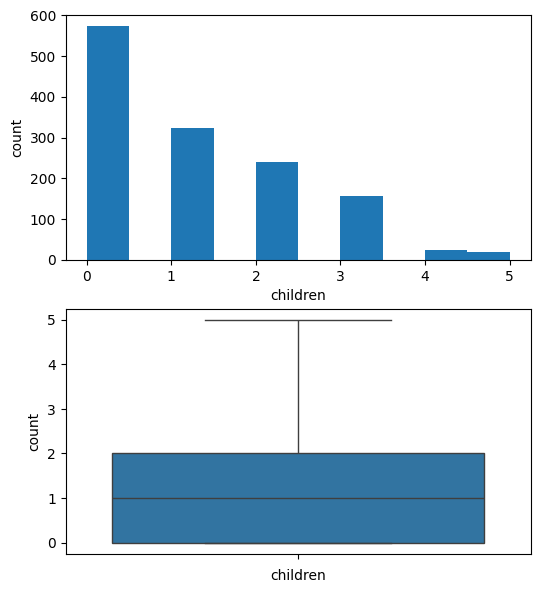

In [165]:
main_num('children')

charges
Mean 13279.121486655948
skewness 1.5153909108403483
kurtos 1.6042206849514362


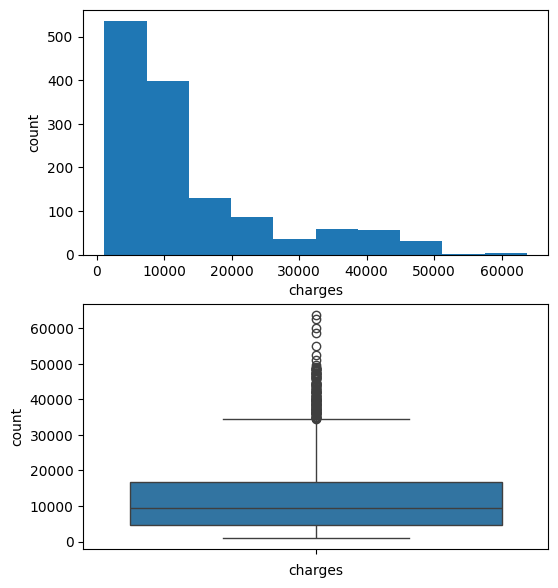

In [166]:
main_num('charges')

**Majority of the Charges are in the range of between 4000 - 17000**

### BI-VARIATE

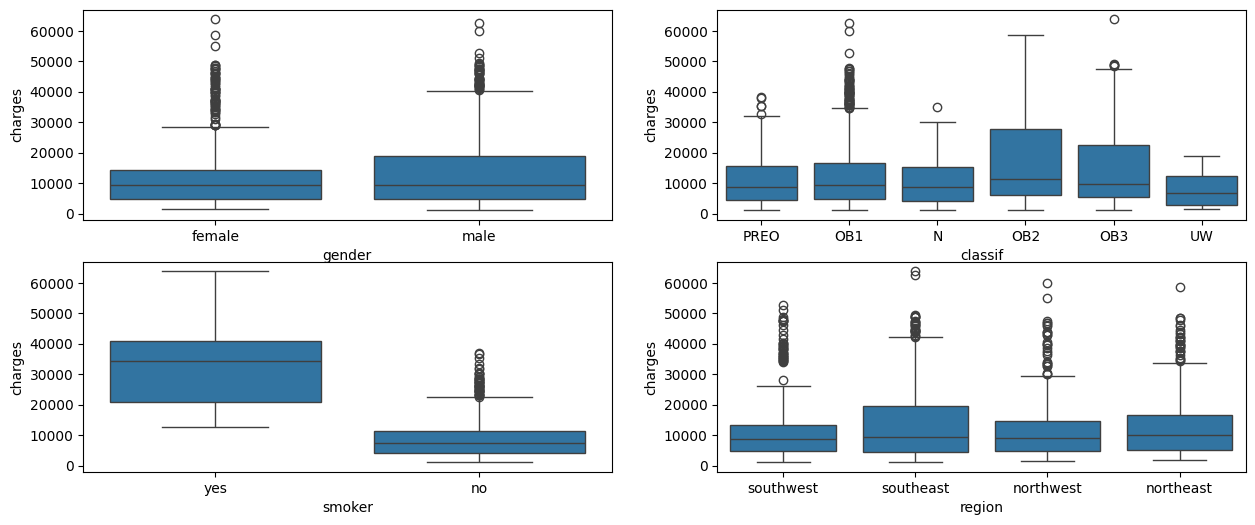

In [167]:
#Analysd categorical values based on the 'charges'

fig,axs = plt.subplots(2,2,figsize = (15,6))
axs = axs.ravel()
j = 0
for i in cat:
    sns.boxplot(y="charges", x =i, data = df, ax=axs[j])
    j+=1

plt.show()

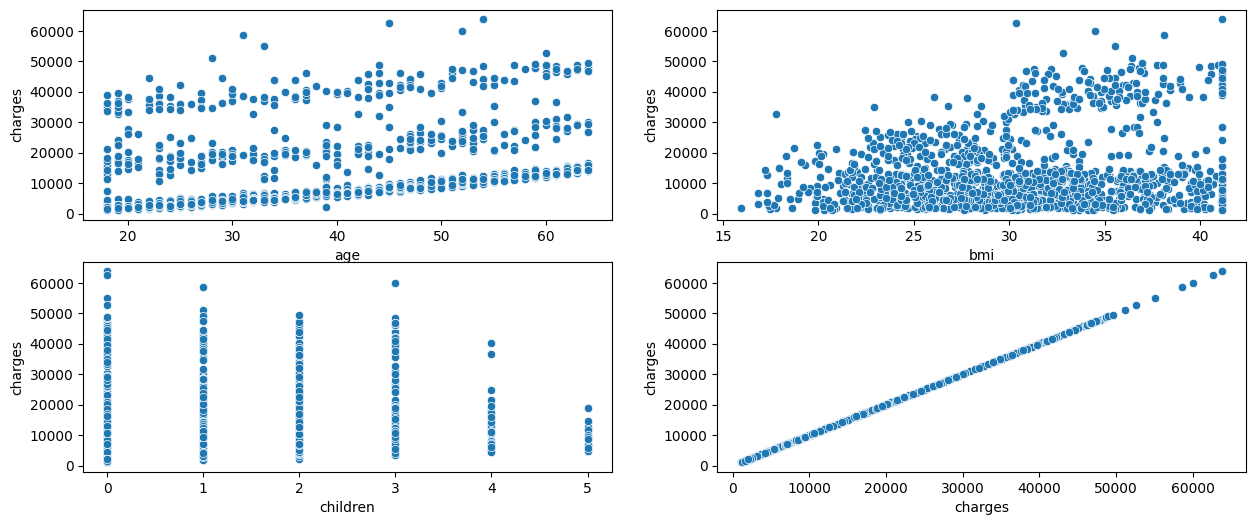

In [168]:
#Visualized numerical values based on the 'charges'

fig,axs = plt.subplots(2,2,figsize = (15,6))
axs = axs.ravel()
j = 0
for i in con:
    sns.scatterplot(y="charges", x =i, data = df, ax=axs[j])
    j+=1

plt.show()

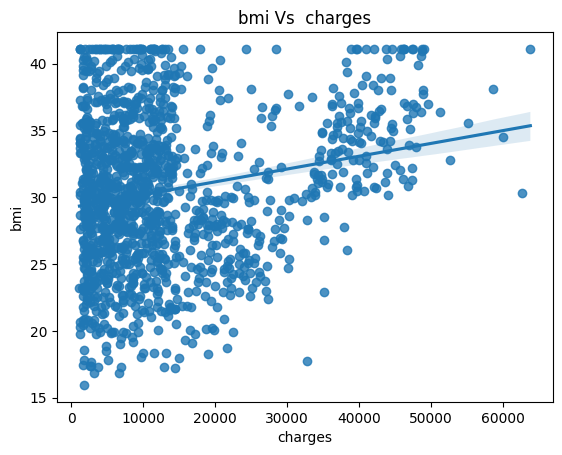

In [169]:
#linear regression plot between 'Bmi' & 'Charges'

sns.regplot(data = df,x = 'charges', y = 'bmi')
plt.title('bmi Vs  charges')
plt.show()

In [170]:
# sns.pairplot(df)
# plt.show()

### Multi-variate

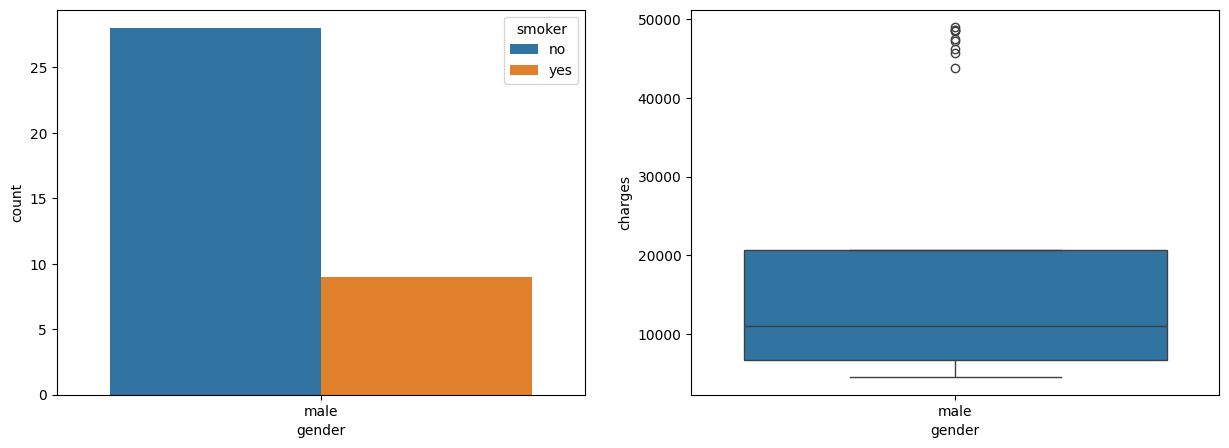

In [171]:
cond1 = df[(df['age'] > 30) & (df['gender'] == 'male') & (df['bmi'] >40)]
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='gender',hue='smoker',data=cond1,ax=ax[0])
sns.boxplot(x='gender',y='charges',data=cond1,ax=ax[1])
plt.show()

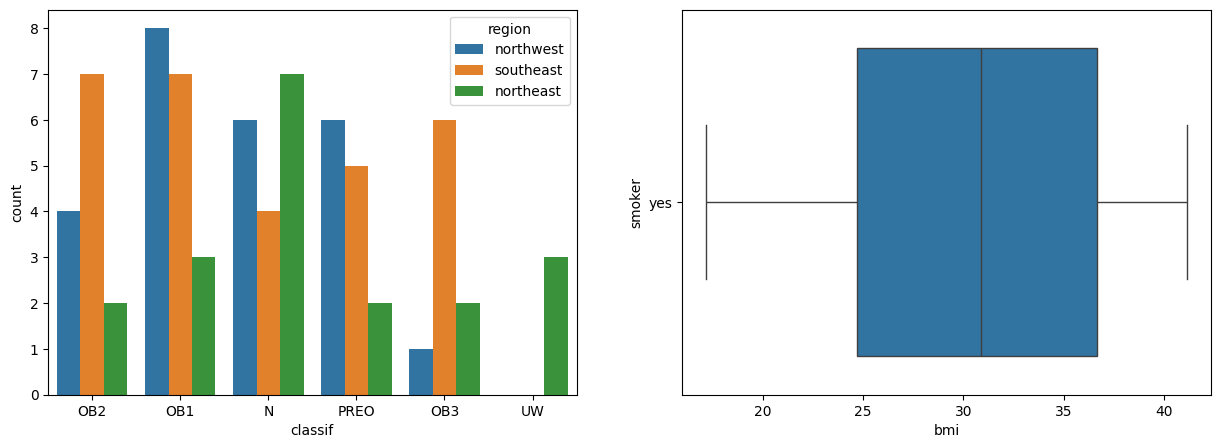

In [172]:
cond2 = df[(df['region'] != 'southwest' ) & (df['children'] >=2) & (df['smoker'] == 'yes')]
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='classif',hue='region',data=cond2,ax=ax[0])
sns.boxplot(x='bmi',y='smoker',data=cond2,ax=ax[1])
plt.show()

### Linear Regression

Label Encoding:

In [173]:
#converting all categorical features (columns) into numerical features

label_encoder = preprocessing.LabelEncoder()
for i in cat:
    df[i] = label_encoder.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   gender    1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   classif   1337 non-null   int64  
 4   children  1337 non-null   int64  
 5   smoker    1337 non-null   int64  
 6   region    1337 non-null   int64  
 7   charges   1337 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 94.0 KB


Feature Scaling:

In [174]:
#scaling all the numerical values under one scale using MinMaxScaler()

num_cat = ['int32', 'float64', 'int64']
num_df  = df.select_dtypes(include=num_cat)
scaler = MinMaxScaler()
scale_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
scale_df

,age,gender,bmi,classif,children,smoker,region,charges
0,0.021739,0.0,0.474789,0.8,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.708207,0.2,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.677589,0.2,0.6,0.0,0.666667,0.053115
3,0.456522,1.0,0.268212,0.0,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.513759,0.8,0.0,0.0,0.333333,0.043816
...,...,...,...,...,...,...,...,...
1332,0.695652,1.0,0.596867,0.2,0.6,0.0,0.333333,0.151299
1333,0.000000,0.0,0.634643,0.2,0.0,0.0,0.000000,0.017305
1334,0.000000,0.0,0.830682,0.4,0.0,0.0,0.666667,0.008108
1335,0.065217,0.0,0.391284,0.8,0.0,0.0,1.000000,0.014144


In [175]:
#correlation between each features

corel_matrix = scale_df.corr()
corel_matrix

,age,gender,bmi,classif,children,smoker,region,charges
age,1.000000,-0.021461,0.115712,0.010254,0.043317,-0.027657,0.002480,0.297212
gender,-0.021461,1.000000,0.043823,-0.007215,0.017848,0.076596,0.004936,0.058044
bmi,0.115712,0.043823,1.000000,0.073167,0.009401,0.000983,0.155385,0.201344
classif,0.010254,-0.007215,0.073167,1.000000,-0.027976,-0.009675,0.013767,-0.037438
children,0.043317,0.017848,0.009401,-0.027976,1.000000,0.007331,0.016258,0.067389
smoker,-0.027657,0.076596,0.000983,-0.009675,0.007331,1.000000,-0.002358,0.787234
region,0.002480,0.004936,0.155385,0.013767,0.016258,-0.002358,1.000000,-0.006547
charges,0.297212,0.058044,0.201344,-0.037438,0.067389,0.787234,-0.006547,1.000000


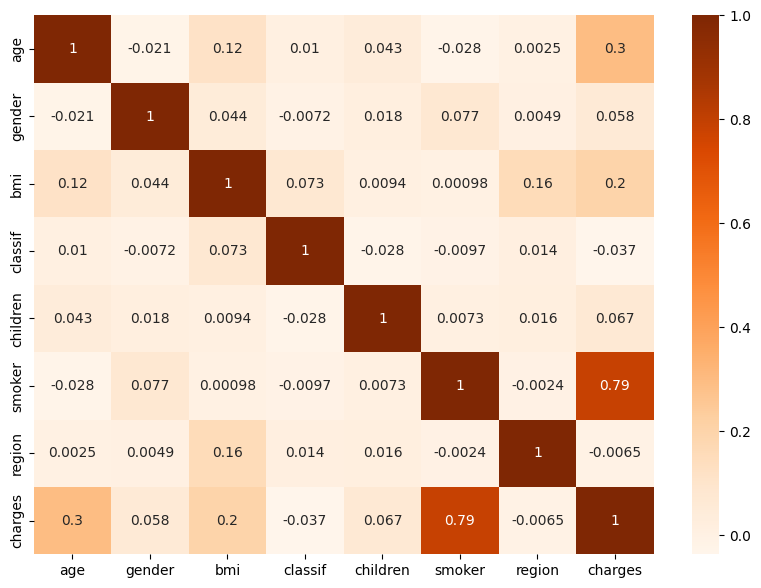

In [176]:
#heat map
plt.figure(figsize=(10,7))
sns.heatmap(corel_matrix, annot = True, cmap = 'Oranges')
plt.show()

In [177]:
#threshold correlation
def correlation(df,threshold):
    col_corr=set()
    corel_matrix=df.corr()
    for i in range(len(corel_matrix.columns)):
        for j in range(i):
            if(abs(corel_matrix.iloc[i,j]))>threshold:
                col_name=corel_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [178]:
sel_features=correlation(scale_df,0.5)
len(set(sel_features))

1

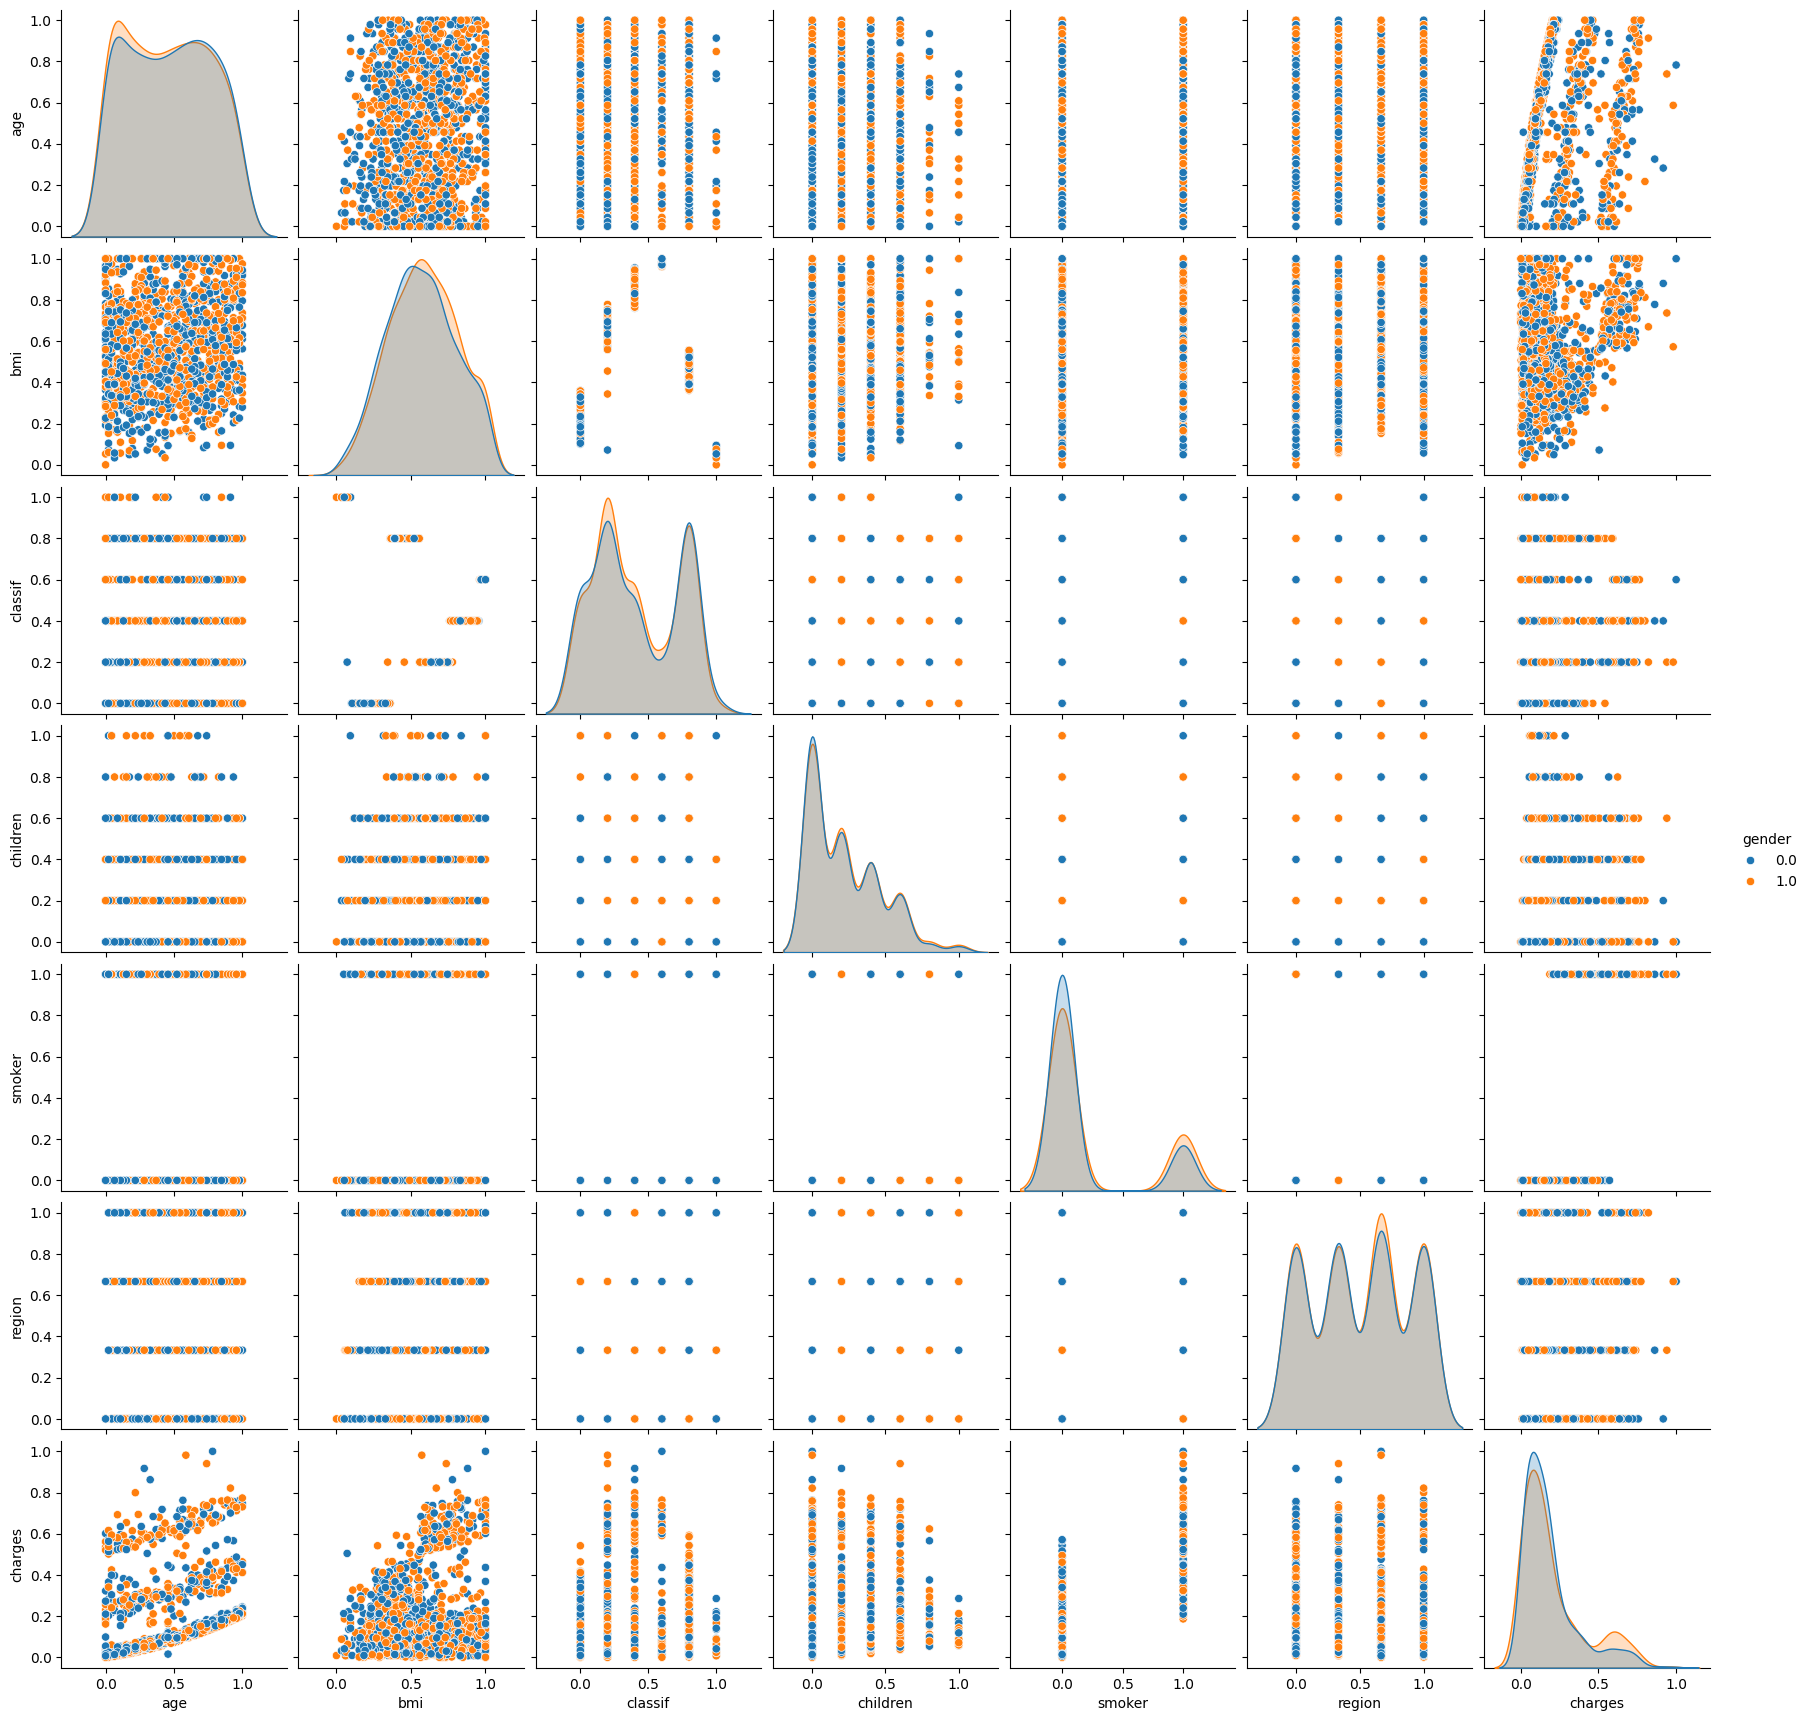

In [179]:
#here smoker hue is 0 & 1
sns.pairplot(scale_df, hue= 'gender')
plt.show()

In [180]:
sel_features

{'charges'}

Splitting the data:

In [181]:
y =df['charges']
X = scale_df.drop(['charges'], axis = 1)

In [182]:
X.shape

(1337, 7)

In [183]:
y.shape

(1337,)

In [184]:
#splitting the data into training nd testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(X_train.shape)
print(y_test.shape)

(935, 7)
(402,)


**Linear Regression:**

In [185]:
linear = LinearRegression()
lr_model = linear.fit(X_train, y_train)

In [186]:
y_pred = lr_model.predict(X_test)

In [187]:
r2_train = lr_model.score(X_train, y_train)
intercept = lr_model.intercept_
slope= lr_model.coef_

In [188]:
lr_rmse = mean_squared_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mape = mean_absolute_percentage_error(y_test, y_pred)

In [189]:
r2_test = lr_model.score(X_test, y_test)
r2_test

0.7691075169404457

In [190]:
print('R_square:', r2_train)
print('Intercept:', intercept)
print('Slope:',slope)

R_square: 0.745669546940236
Intercept: -1967.5952144069306
Slope: [12568.98230912    85.04762776  9166.70889439 -2109.75704835
  2786.88807072 23323.61358059  -890.96827841]


In [191]:
r2_score_train=[]
r2_score_test=[]
rmse=[]
mse=[]
mae=[]
mape=[]

In [192]:
print("RMSE:", lr_rmse)
rmse.append(lr_rmse)
print("MSE:", lr_mse)
mse.append(lr_mse)
print("MAE:", lr_mae )
mae.append(lr_mae)
print("MAPE:", lr_mape)
mape.append(lr_mape)

RMSE: 35082079.60996332
MSE: 35082079.60996332
MAE: 4101.523694974671
MAPE: 0.4238801053655165


In [193]:
f = 7 #features count
print("tr:",r2_train)
print("te:",r2_test)

tr: 0.745669546940236
te: 0.7691075169404457


In [194]:
# def adjusted_r2_score(model,x,y):
#     r2_scores=model.score(x,y)
#     n=x.count()
#     x=len(X_test.columns)-1
#     adjusted_r2_score=1-((1-r2_scores)*(n-1)/(n-x-1))
#     return adjusted_r2_score[0]

In [195]:
adjusted_train_r2 = 1-((1-0.64)*(935-1)/(935-f-1))
adjusted_test_r2 = 1-((1-0.70)*(402-1)/(402-f-1))
print("Adjusted Train R2:",adjusted_train_r2)
r2_score_train.append(adjusted_train_r2)
print("Adjusted Test R2:", adjusted_test_r2)
r2_score_test.append(adjusted_test_r2)
#clear descp

Adjusted Train R2: 0.6372815533980583
Adjusted Test R2: 0.6946700507614213


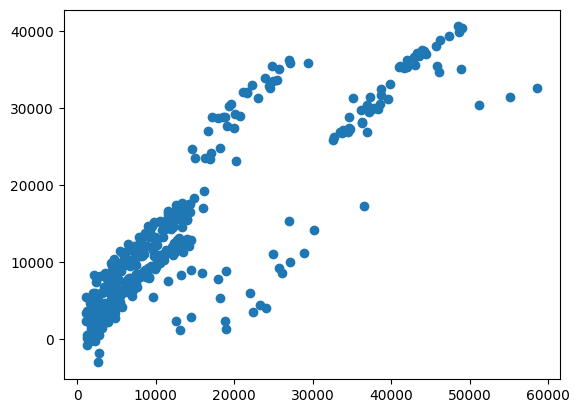

In [196]:
plt.scatter(y_test,y_pred)
plt.show()

## Decision Tree Regressor

In [197]:
from sklearn import tree

In [198]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)

In [199]:
dt = DecisionTreeRegressor()

In [200]:
param_grid2={"min_samples_split":np.arange(10,51,10),
            "min_samples_leaf":np.arange(10,101,20),
            "max_depth":np.arange(3,15)}

In [201]:
grid_cv2 = GridSearchCV(dt,param_grid2,cv=kf,scoring="r2")

In [202]:
grid_cv2.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50])},
             scoring='r2')

In [203]:
grid_cv2.best_score_

np.float64(0.8275643637892347)

In [204]:
grid_cv2.best_params_

{'max_depth': np.int64(4),
 'min_samples_leaf': np.int64(10),
 'min_samples_split': np.int64(30)}

In [205]:
grid_cv2.best_estimator_

DecisionTreeRegressor(max_depth=np.int64(4), min_samples_leaf=np.int64(10),
                      min_samples_split=np.int64(30))

In [206]:
dt_model = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=30)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=30)

In [207]:
dt_r2train = dt_model.score(X_train,y_train)

r2_score_train.append(dt_r2train)
dt_r2train

0.8596344936327884

In [208]:
dt_r2test = dt_model.score(X_test, y_test)
r2_score_test.append(dt_r2test)
dt_r2test

0.8774914234393274

In [209]:
y_pred1=dt_model.predict(X_test)

In [210]:
dt_rmse = mean_squared_error(y_test, y_pred1)
dt_r2 = r2_score(y_test,y_pred1)
dt_mae = mean_absolute_error(y_test, y_pred1)
dt_mape = mean_absolute_percentage_error(y_test, y_pred1)

In [211]:
print("rmse",dt_rmse)
rmse.append(dt_rmse)
print("r2:",dt_r2)
mse.append(dt_r2)
print("Mae:", dt_mae)
mae.append(dt_mae)
print("MAPE:", dt_mape)
mape.append(dt_mape)

rmse 18614099.42348036
r2: 0.8774914234393274
Mae: 2719.2022174343656
MAPE: 0.36244862830009694


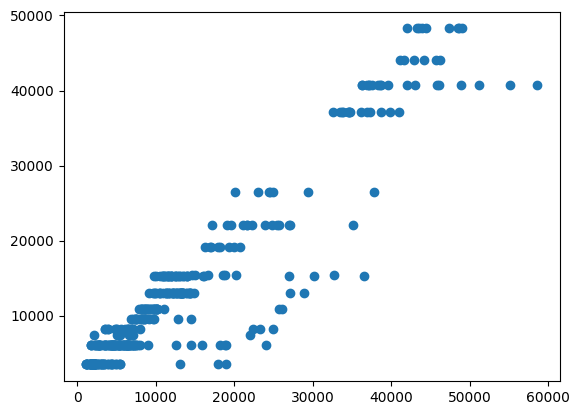

In [212]:
plt.scatter(y_test,y_pred1)
plt.show()

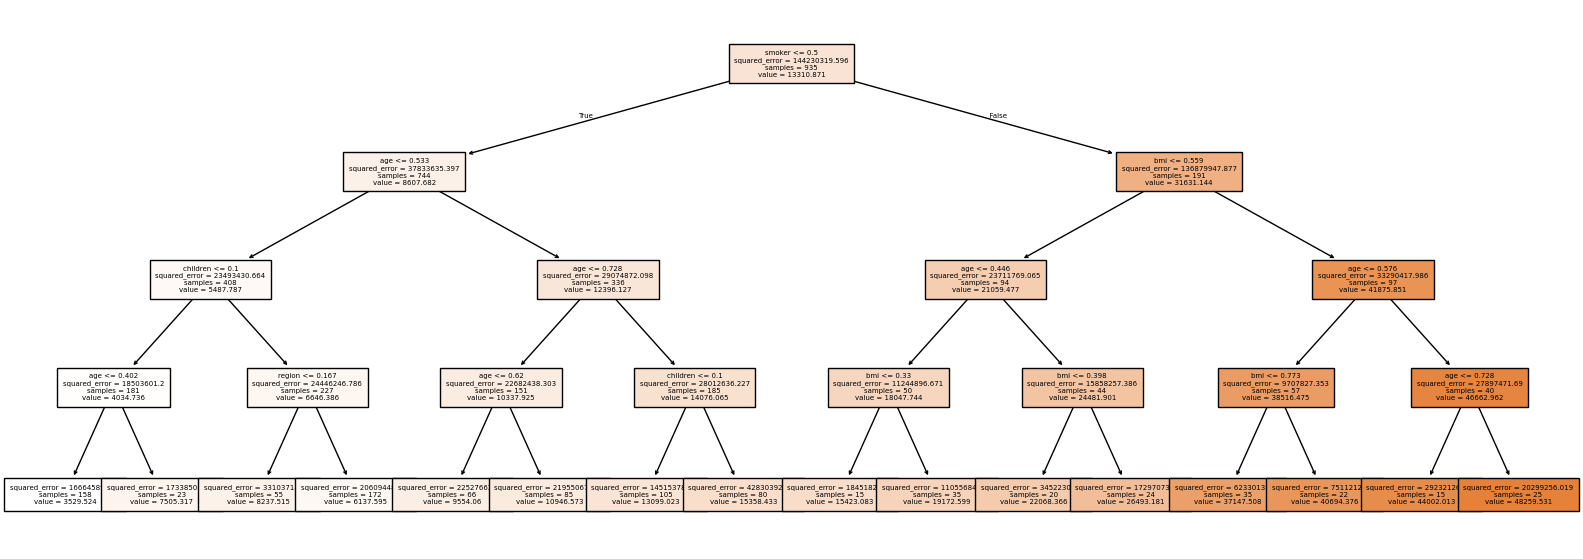

In [213]:
plt.figure(figsize=(20,7))
tree.plot_tree(dt_model,feature_names=X.columns,filled=True,fontsize=5)
plt.show()

## Random Forest Regressor

In [214]:
param_grid={"n_estimators":np.arange(20,201,20),
            "min_samples_split":np.arange(10,51,10),
            "min_samples_leaf":np.arange(10,101,20),
            "max_depth":np.arange(3,15)}

In [215]:
rf = RandomForestRegressor()

In [216]:
grid_cv1=GridSearchCV(rf,param_grid,cv=kf,scoring="r2")

In [217]:
# grid_cv1.fit(X_train,y_train)

In [218]:
# grid_cv1.best_score_

In [219]:
# grid_cv1.best_params_

In [220]:
# grid_cv1.best_estimator_

In [221]:
rf_model = RandomForestRegressor(max_depth=4, min_samples_leaf=40, min_samples_split=10,n_estimators=10)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=40, min_samples_split=10,
                      n_estimators=10)

In [222]:
rf_r2_train = rf_model.score(X_train,y_train)
r2_score_train.append(rf_r2_train)
rf_r2_train

0.8363154879035515

In [223]:
rf_r2_test = rf_model.score(X_test, y_test)
r2_score_test.append(rf_r2_test)
rf_r2_test

0.8658122723308576

In [224]:
y_pred2=rf_model.predict(X_test)


In [225]:
rf_rmse = mean_squared_error(y_test, y_pred2)
rf_r2 = r2_score(y_test,y_pred2)
rf_mae =  mean_absolute_error(y_test, y_pred2)
rf_mape = mean_absolute_percentage_error(y_test, y_pred2)

In [226]:
print("rmse",rf_rmse)
rmse.append(rf_rmse)
print("r2:",rf_r2)
mse.append(rf_r2)
print("Mae:",rf_mae)
mae.append(rf_mae)
print("MAPE:", rf_mape)
mape.append(rf_mape)

rmse 20388643.59024932
r2: 0.8658122723308576
Mae: 2861.177099688956
MAPE: 0.3327327675556801


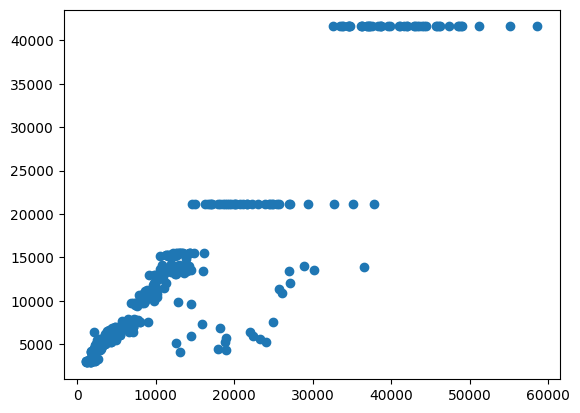

In [227]:
plt.scatter(y_test,y_pred2)
plt.show()

### Ada Booster

In [228]:
ada = AdaBoostRegressor()

In [229]:
kf=KFold(n_splits=5)

In [230]:
param_grid={"n_estimators":np.arange(10,101,10),
            "learning_rate":np.arange(0.05,1,0.05),
}

In [231]:
grid_cv = GridSearchCV(ada,param_grid,cv=kf,scoring="r2")


In [232]:
# grid_cv.fit(X_train,y_train)

In [233]:
# grid_cv.best_params_

In [234]:
# grid_cv.best_estimator_

In [235]:
# grid_cv.best_score_  #accuracy

In [236]:
# ada_model = AdaBoostRegressor(learning_rate=0.05, n_estimators=20,random_state=42)

# # ada_model.fit(X_train,y_train)

In [237]:
# adr2_train = ada_model.score(X_train,y_train)
# r2_score_train.append(adr2_train)
# adr2_train

In [238]:
# adr2_test = ada_model.score(X_test,y_test)
# # r2_score_test.append(adr2_test)
# adr2_test

In [239]:
# y_pred3 = ada_model.predict(X_test)

In [240]:
# ad_rmse = mean_squared_error(y_test, y_pred3, squared=False)
# ad_r2 = r2_score(y_test,y_pred3)
# ad_mae =  mean_absolute_error(y_test, y_pred3)
# ad_mape = mean_absolute_percentage_error(y_test, y_pred3)

In [241]:
# print("rmse",ad_rmse)
# rmse.append(ad_rmse)
# print("r2:",ad_r2)
# mse.append(ad_r2)
# print("Mae:", ad_mae)
# mae.append(ad_mae)
# print("MAPE:",ad_mape)
# mape.append(ad_mape)

In [242]:
# plt.scatter(y_test,y_pred3)
# plt.show()

## KNN

In [243]:
r2_scores=[]
for k in range(2,25):
    knn_score=cross_val_score(KNeighborsRegressor(k),X_train,y_train,scoring="r2",cv=kf)
    r2_scores.append(np.mean(knn_score))

In [244]:
for k in range(2,25):
    print("number of neighbors:",k,":",r2_scores[k-2])

number of neighbors: 2 : 0.7571699516100588
number of neighbors: 3 : 0.7733296061789321
number of neighbors: 4 : 0.7838633735065867
number of neighbors: 5 : 0.7840041075249208
number of neighbors: 6 : 0.7850122418339847
number of neighbors: 7 : 0.7866866391960784
number of neighbors: 8 : 0.781186207572443
number of neighbors: 9 : 0.7797959325964433
number of neighbors: 10 : 0.7782861594357287
number of neighbors: 11 : 0.7776889836764787
number of neighbors: 12 : 0.77514409982174
number of neighbors: 13 : 0.7752935058251218
number of neighbors: 14 : 0.7723713611433186
number of neighbors: 15 : 0.7671458787268695
number of neighbors: 16 : 0.7666374856673361
number of neighbors: 17 : 0.7656842623720405
number of neighbors: 18 : 0.7637259908352461
number of neighbors: 19 : 0.7621554869990601
number of neighbors: 20 : 0.7586304851535021
number of neighbors: 21 : 0.7564035511517199
number of neighbors: 22 : 0.7535640545779019
number of neighbors: 23 : 0.7508862537273169
number of neighbors: 

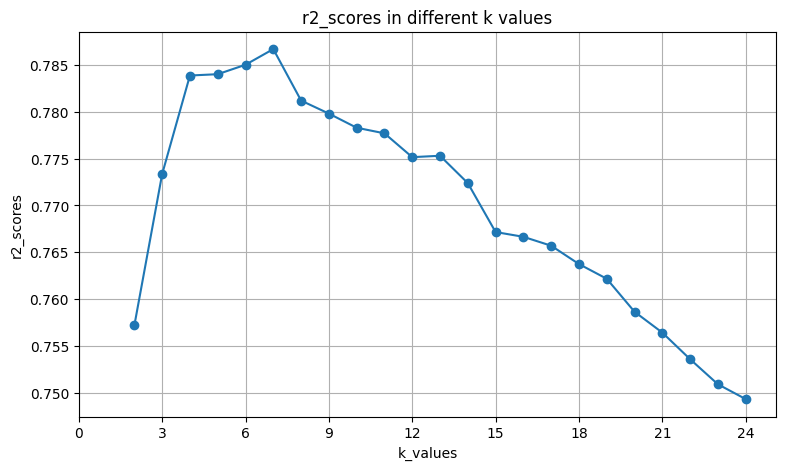

In [245]:
plt.figure(figsize=(9,5))
plt.plot(range(2,25),r2_scores,marker="o")
plt.ylabel("r2_scores")
plt.xlabel("k_values")
plt.title("r2_scores in different k values")
plt.xticks(range(0,25,3))
plt.grid()
plt.show()

In [246]:
k= 9
kn_model = KNeighborsRegressor(k).fit(X_train, y_train)
y_pred_4 = kn_model.predict(X_test)

In [247]:
knr2_train = kn_model.score(X_train, y_train)
r2_score_train.append(knr2_train)
knr2_test = kn_model.score(X_test, y_test)
r2_score_test.append(knr2_test)

In [248]:
# print("Model adjusted r2 score on training data :",adjusted_r2_score(knn_model,x_train,y_train))
# print("Model adjusted r2 score on test data :",adjusted_r2_score(knn_model,x_test,y_test))
# print()

In [249]:
print("accuracy_train:",knr2_train)
print("accuracy_test:",knr2_test)

accuracy_train: 0.8409449272875684
accuracy_test: 0.8627787669467091


In [250]:
kn_rmse = mean_squared_error(y_test, y_pred_4)
kn_r2 = r2_score(y_test,y_pred_4)
kn_mae = mean_absolute_error(y_test, y_pred_4)
kn_mape = mean_absolute_percentage_error(y_test, y_pred_4)

In [251]:
print("rmse",kn_rmse)
rmse.append(kn_rmse)
print("r2:",kn_r2)
mse.append(kn_r2)
print("Mae:", kn_mae)
mae.append(kn_mae)
print("Mape:", kn_mape)
mape.append(kn_mape)

rmse 20849558.020956453
r2: 0.8627787669467091
Mae: 2820.0513109969593
Mape: 0.3710244146345052


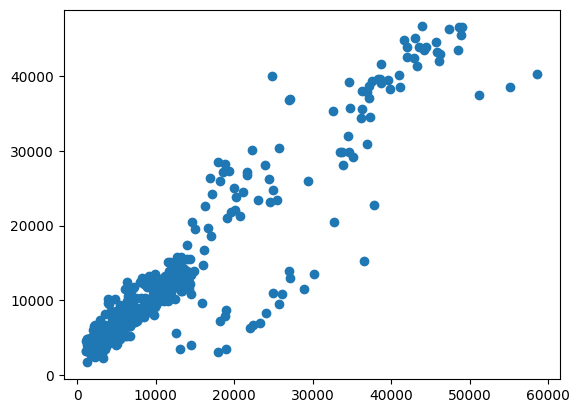

In [252]:
plt.scatter(y_test,y_pred_4)
plt.show()

## Stacking

In [253]:
level1=[]
level1.append(("lr",lr_model))
level1.append(("knn",kn_model))
level1.append(("svr",SVR()))
level1.append(("dt",dt_model))
# level1.append(("rnd",rf_model))
# level1.append(("ada", ada_model))
level2=LinearRegression()
stack_model=StackingRegressor(estimators=level1,final_estimator=level2,cv=kf)

In [254]:
level1

[('lr', LinearRegression()),
 ('knn', KNeighborsRegressor(n_neighbors=9)),
 ('svr', SVR()),
 ('dt',
  DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=30))]

In [255]:
st_model =stack_model.fit(X_train, y_train)
y_pred_st = st_model.predict(X_test)

In [256]:
score=cross_val_score(stack_model,X_train,y_train,scoring="r2",cv=kf)
print(score)

[0.87283053 0.86782187 0.82753074 0.78900548 0.8141647 ]


In [257]:
print("Rscore:",np.mean(score))

Rscore: 0.8342706623771659


In [258]:
str2_train = st_model.score(X_train, y_train)
r2_score_train.append(str2_train)
str2_test = st_model.score(X_test, y_test)
r2_score_test.append(str2_test)

In [259]:
print("R-square train data:",str2_train )
print("R-square test data:",str2_test )

R-square train data: 0.8627655915391932
R-square test data: 0.8834345717528501


In [260]:
st_rmse = mean_squared_error(y_test, y_pred_st)
st_r2 = r2_score(y_test,y_pred_st)
st_mae = mean_absolute_error(y_test, y_pred_st)
st_mape = mean_absolute_percentage_error(y_test, y_pred_st)

In [261]:
print("rmse",st_rmse)
rmse.append(st_rmse)
print("r2:",st_r2)
mse.append(st_r2)
print("Mae:",st_mae)
mae.append(st_mae)
print("MAPE:", st_mape)
mape.append(st_mape)

rmse 17711090.37136218
r2: 0.8834345717528501
Mae: 2582.1862717795348
MAPE: 0.3439960696642301


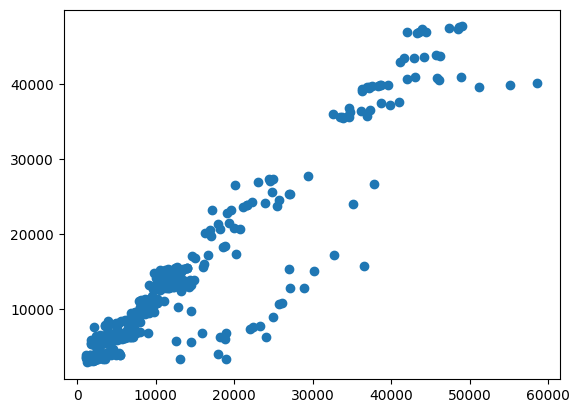

In [262]:
plt.scatter(y_test,y_pred_st)
plt.show()

**Summary:**

In [263]:
model_list=["Linear Regression","Decision Tree Regression","KNN Regression","Stacked Regression"]
metric_list=["Models","r2 Score(Train)","r2 Score(Test)","RMSE","MSE","MAE","MAPE"]

In [264]:
mse

[35082079.60996332,
 0.8774914234393274,
 0.8658122723308576,
 0.8627787669467091,
 0.8834345717528501]

In [265]:
rmse

[35082079.60996332,
 18614099.42348036,
 20388643.59024932,
 20849558.020956453,
 17711090.37136218]

In [266]:
mae

[4101.523694974671,
 2719.2022174343656,
 2861.177099688956,
 2820.0513109969593,
 2582.1862717795348]

In [267]:
final_results=pd.DataFrame()
for i in range(0,len(model_list)):
    ab=[[model_list[i],r2_score_train[i],r2_score_test[i],rmse[i],mse[i],mae[i],mape[i]]]
    new=pd.DataFrame(ab)
    final_results=pd.concat([final_results,new],axis=0)
final_results.columns=metric_list
final_results=final_results.reset_index(drop=True)
final_results

,Models,r2 Score(Train),r2 Score(Test),RMSE,MSE,MAE,MAPE
0,Linear Regression,0.637282,0.694670,3.508208e+07,3.508208e+07,4101.523695,0.423880
1,Decision Tree Regression,0.859634,0.877491,1.861410e+07,8.774914e-01,2719.202217,0.362449
2,KNN Regression,0.836315,0.865812,2.038864e+07,8.658123e-01,2861.177100,0.332733
3,Stacked Regression,0.840945,0.862779,2.084956e+07,8.627788e-01,2820.051311,0.371024


In [268]:
rvse_list = list(final_results['Models'])
rvse_list

['Linear Regression',
 'Decision Tree Regression',
 'KNN Regression',
 'Stacked Regression']

In [269]:
# rvse_list.reverse()

In [270]:
rvse_list

['Linear Regression',
 'Decision Tree Regression',
 'KNN Regression',
 'Stacked Regression']

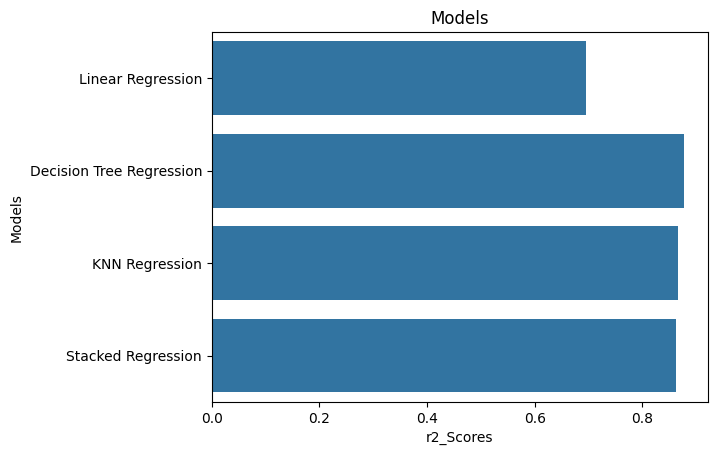

In [271]:
models = final_results['Models']
test_score = final_results['r2 Score(Test)']
# ab = round(test_score.reverse(),4)

# Explicitly set x and y arguments
sns.barplot(x=test_score, y=models, orient='h', order=rvse_list)
plt.xlabel('r2_Scores')
# for i, v in enumerate(test_score):
#     plt.text(v, i, str(v), ha='left', va='center')
plt.title('Models')
plt.show()

# Over all 'Stacked Regression Model' outperformed 'Decision Tree Regressor', R2 score is 88%

In [272]:
import pickle

# Find the best model based on the R2 score on the test set
best_model_index = final_results['r2 Score(Test)'].idxmax()
best_model_name = final_results.loc[best_model_index, 'Models']

# Get the actual best model object
if best_model_name == "Linear Regression":
    best_model = lr_model
elif best_model_name == "Decision Tree Regression":
    best_model = dt_model
elif best_model_name == "Random Forest Regressor":
     best_model = rf_model
elif best_model_name == "Ada Booster":
     best_model = ada_model
elif best_model_name == "KNN Regression":
    best_model = kn_model
elif best_model_name == "Stacked Regression":
    best_model = st_model
else:
    best_model = None
    print(f"Could not find model object for {best_model_name}")


if best_model is not None:
    # Pickle the best model
    filename = f'{best_model_name.replace(" ", "_").lower()}_model.pkl'
    with open(filename, 'wb') as f:
        pickle.dump(best_model, f)

    print(f"Best model '{best_model_name}' pickled successfully as '{filename}'")

    # You can also download the pickled file
    try:
        files.download(filename)
    except NameError:
        print("google.colab.files not imported. Skipping download.")



Best model 'Decision Tree Regression' pickled successfully as 'decision_tree_regression_model.pkl'
google.colab.files not imported. Skipping download.


In [273]:
!pip install flask pandas scikit-learn pyngrok

import numpy as np
import pandas as pd
import pickle
from flask import Flask, request, jsonify, render_template_string
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import os
from pyngrok import ngrok

# Define HTML template for input form
HTML_FORM = """
<!doctype html>
<title>Insurance Charge Prediction</title>
<h2>Predict Insurance Charges</h2>
<form method="post">
    Age: <input type="text" name="age"><br>
    Gender:
    <select name="gender">
        <option value="male">male</option>
        <option value="female">female</option>
    </select><br>
    BMI: <input type="text" name="bmi"><br>
    Children: <input type="text" name="children"><br>
    Smoker:
    <select name="smoker">
        <option value="yes">yes</option>
        <option value="no">no</option>
    </select><br>
    Region:
    <select name="region">
        <option value="southwest">southwest</option>
        <option value="southeast">southeast</option>
        <option value="northwest">northwest</option>
        <option value="northeast">northeast</option>
    </select><br>
    Classif:
    <select name="classif">
        <option value="Overweight">Overweight</option>
        <option value="Obesity Stage 1">Obesity Stage 1</option>
        <option value="Pre-Obesity">Pre-Obesity</option>
        <option value="Normal Weight">Normal Weight</option>
        <option value="Obesity Stage 2">Obesity Stage 2</option>
        <option value="Underweight">Underweight</option>
        <option value="Obesity Stage 3">Obesity Stage 3</option>
    </select><br>
    <input type="submit" value="Predict">
</form>
{% if prediction %}
    <h3>Predicted Insurance Charge: {{ prediction }}</h3>
{% endif %}
"""

# Load the pre-trained model (assuming stacked_regression_model.pkl was saved from the previous code)
try:
    with open('stacked_regression_model.pkl', 'rb') as f:
        model = pickle.load(f)
    print("Stacked Regression model loaded successfully.")
except FileNotFoundError:
    print("Error: stacked_regression_model.pkl not found. Please ensure the model is pickled and saved.")
    # As a fallback, try other models if available (less ideal)
    try:
        with open('random_forest_regressor_model.pkl', 'rb') as f:
            model = pickle.load(f)
        print("Random Forest Regressor model loaded successfully as fallback.")
    except FileNotFoundError:
         print("Error: random_forest_regressor_model.pkl also not found. Please run the preceding code to train and save a model.")
         model = None # Set model to None if no model is found

# Data preparation (same as in the preceding code, needed for scaling/encoding)
df = pd.read_csv('/Insurance_Data_Project.csv')
df['classif'].fillna(df['classif'].mode()[0], inplace=True)
df.drop_duplicates(keep='first',inplace=True)
df["age"][(df["age"]<5)|(df["age"]>100)]=round(df["age"].mean(),0)
df['bmi'] = df['bmi'].clip(upper = df['bmi'].quantile(0.95))

cat_cols = ['gender', 'classif', 'smoker', 'region']
for i in cat_cols:
    le = LabelEncoder() # Create a new LabelEncoder for each column
    # Fit on the training data column to ensure all possible categories are known
    le.fit(df[i])
    df[i] = le.transform(df[i]) # Transform the original df

num_cat = ['int32', 'float64', 'int64']
num_df  = df.select_dtypes(include=num_cat)
scaler = MinMaxScaler()
scaler.fit(num_df.drop('charges', axis=1)) # Fit scaler on features


app = Flask(__name__)


@app.route('/', methods=['GET', 'POST'])
def predict():
    prediction = None
    if request.method == 'POST':
        try:
            # Get input data from form
            age = float(request.form['age'])
            gender = request.form['gender']
            bmi = float(request.form['bmi'])
            children = int(request.form['children'])
            smoker = request.form['smoker']
            region = request.form['region']
            classif = request.form['classif']

            # Create a DataFrame from the input
            input_data = pd.DataFrame([[age, gender, bmi, children, smoker, region, classif]],
                                      columns=['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'classif'])

            # Apply the same preprocessing as the training data
            # Label encode categorical features
            for i in cat_cols:
                le = LabelEncoder()
                # Fit on the training data column to ensure all possible categories are known
                le.fit(df[i]) # Fit on the original df column
                input_data[i] = le.transform(input_data[i])

            # Scale numerical features
            input_scaled = scaler.transform(input_data)

            # Make prediction
            if model is not None:
                prediction = model.predict(input_scaled)[0]
                prediction = f"${prediction:,.2f}" # Format as currency
            else:
                prediction = "Model not loaded. Cannot predict."

        except Exception as e:
            prediction = f"Error: {e}"

    return render_template_string(HTML_FORM, prediction=prediction)

if __name__ == '__main__':
    if model is not None:
        # Authenticate ngrok (replace with your actual authtoken from https://dashboard.ngrok.com/get-started/your-authtoken)
        # You can add your authtoken as a Colab secret and access it like:
        # from google.colab import userdata
        # ngrok.set_auth_token(userdata.get('NGROK_AUTH_TOKEN'))
        # For a free account, authtoken might not be strictly necessary for basic http tunnels, but it's good practice.
        # ngrok.set_auth_token("YOUR_NGROK_AUTHTOKEN")


        # Establish a public tunnel
        public_url = ngrok.connect(5000).public_url
        print(f" * Ngrok Tunnel established at: {public_url}")

        # Run the Flask app
        app.run()
    else:
        print("Flask app not started because the model could not be loaded.")

Error: stacked_regression_model.pkl not found. Please ensure the model is pickled and saved.
Error: random_forest_regressor_model.pkl also not found. Please run the preceding code to train and save a model.
Flask app not started because the model could not be loaded.
